In [1]:
#Import required libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:')


In [4]:
#Importing Data
db_dir = os.getcwd()
db_dir = db_dir + '/data/MMA 860 Assessing and Testing Data File v1.0.xlsx'
data = pd.read_excel(db_dir, sheet_name='Sales Data')

In [7]:
# b. Run a linear regression model to explain order size in terms of Ad_Budget and Distance.

#Import the required package from sklearn
from sklearn.linear_model import LinearRegression

'''
In order to input data from a pandas dataframe and into a sci-kit function,
we need to convert the dataframe series into NumPy Arrays. This can be done
with the values function.
'''
train_X = data[['Ad_Budget','Distance']].values
train_y = data['Order_Size'].values

'''
Fitting data to a regression model requires two arguments, the training X
values (independent variables) and the training y values (dependent variables.
In general, most fit functions for models follow this format.
'''
reg = LinearRegression().fit(train_X, train_y)

print("R-Squared:", reg.score(train_X, train_y))

R-Squared: 0.6445539057412384


In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

'''
Fitting a model involves passing two arguments to ols: the general formula as
a string and the data set used. Remember that the formula's attributes must
match the column names in the dataframe. Then the fit() function is run and
then summary() can be applied to that model.
'''
model = ols('Order_Size ~ Ad_Budget + Distance',data).fit()
print(model.summary())


# •	R-squared: The model explains about 64.5% of the variance in order size, which is moderately good.
# •	Coefficients:
# •	Ad_Budget has a positive coefficient of 0.0027, significant at nearly any conventional level (p-value < 0.001), indicating a strong and positive effect on order size.
# •	Distance has a positive coefficient of 0.1444, but it’s not statistically significant (p-value = 0.490). This suggests that Distance may not be a useful predictor of order size in this model.

# The model effectively captures the relationship between Ad_Budget and order size, but Distance does not appear to contribute meaningfully to explaining variations in order size in this context. 
# The high condition number calls for further inspection to ensure the robustness of the model, potentially involving scaling of predictors or deeper multicollinearity diagnostics.

                            OLS Regression Results                            
Dep. Variable:             Order_Size   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     178.6
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           5.64e-45
Time:                        14:32:48   Log-Likelihood:                -800.86
No. Observations:                 200   AIC:                             1608.
Df Residuals:                     197   BIC:                             1618.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.8988      2.583     10.415      0.0

In [ ]:
# c. Assess the results. Are there problems?
# Potential Statistical Issues:
# 	•	Condition Number: The model has a high condition number (33,900), indicating potential issues with multicollinearity or numerical problems 
#       such as scaling differences between predictors. High multicollinearity can inflate the variance of the coefficient estimates and make the model unstable.
# 	•	Insignificance of Distance: Given its high p-value, Distance might not be necessary in the model, as its inclusion does not improve the model’s ability to predict order size.

# Significance of the F-test:

# 1.	Statistical Threshold:
# •	A significant F-test indicates that at least one of the predictor variables in the model reliably predicts the dependent variable.
# •	The significance of an F-test is usually determined by the p-value associated with the F-statistic. A commonly used threshold for significance is a p-value of less than 0.05. If the p-value is below this threshold, it is generally considered evidence that the model provides a better fit to the data than a model with no predictors (i.e., only the intercept).

In [ ]:
# d. Determine if Distance belongs in the model.	
#     1.	Statistical Significance:
# 	•	As observed in the regression output, the coefficient for Distance had a p-value of 0.490, which is much higher than the typical significance level of 0.05. This suggests that Distance does not significantly contribute to predicting Order_Size in the presence of Ad_Budget.
# 	2.	Change in R-squared:
# 	•	The original model (including both Ad_Budget and Distance) had an R-squared of 0.645. When Distance was removed, the R-squared remained almost unchanged at 0.644. This indicates that removing Distance does not significantly decrease the explanatory power of the model.
# 	3.	Model Comparison:
# 	•	Comparing the full model with the reduced model (excluding Distance), you can look at the Adjusted R-squared, which compensates for the number of predictors in the model. The Adjusted R-squared slightly improved from 0.641 in the full model to 0.642 in the reduced model, suggesting that Distance may not be necessary for achieving a better model fit.
# 	4.	F-statistic Comparison:
# 	•	The full model had an F-statistic of 178.6, while the reduced model had an F-statistic of 357.7. The increase in the F-statistic, along with the stable R-squared upon removing Distance, suggests that the simpler model is more efficient at explaining the variation in Order_Size without losing predictive power. -->

In [9]:
# e. Rerun the model without distance.
import statsmodels.api as sm
from statsmodels.formula.api import ols

'''
Fitting a model involves passing two arguments to ols: the general formula as
a string and the data set used. Remember that the formula's attributes must
match the column names in the dataframe. Then the fit() function is run and
then summary() can be applied to that model.
'''
model = ols('Order_Size ~ Ad_Budget',data).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Order_Size   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     357.7
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           3.01e-46
Time:                        15:03:43   Log-Likelihood:                -801.10
No. Observations:                 200   AIC:                             1606.
Df Residuals:                     198   BIC:                             1613.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.1951      1.773     15.904      0.0

In [10]:
# 2a. Import the data from tab ‘Bimodal Error 1’.
#Importing Data
db_dir = os.getcwd()
db_dir = db_dir + '/data/MMA 860 Assessing and Testing Data File v1.0.xlsx'
data = pd.read_excel(db_dir, sheet_name='Bimodal Error 1')

In [12]:
# b. Run the linear regression model y = b0 + b1 x1 + b2 x2 with the default settings.


from sklearn.linear_model import LinearRegression

train_X = data[['X1', 'X2']].values
train_y = data['Y'].values

reg = LinearRegression().fit(train_X, train_y)

print("R-Squared:", reg.score(train_X, train_y))
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Y ~ X1+X2',data).fit()
print(model.summary())

# The model shows a very high degree of fit with the data, but the diagnostics suggest potential issues with the distribution of residuals, which might affect the validity of some of the model assumptions, particularly concerning the normality of errors. This could imply model misspecification or peculiarities in the data distribution such as outliers or a non-linear relationship not captured by the model. Further investigation into these aspects would be warranted to ensure robustness and reliability of the model’s predictions and inferences. 

# •	R-squared: 0.992 - This indicates that the model explains about 99.2% of the variability in the dependent variable  Y , which is exceptionally high.
# •	Coefficients:
# •	Intercept ( b_0 ): 1159.3613 with a p-value < 0.001, indicating it is statistically significant.
# •	 X_1  Coefficient ( b_1 ): 100.1730, also with a p-value < 0.001, showing a strong positive relationship with  Y . This suggests that for each unit increase in  X_1 ,  Y  increases by approximately 100.1730 units.
# •	 X_2  Coefficient ( b_2 ): 10.8075 with a p-value < 0.001, indicating a positive relationship with  Y  but with a smaller effect than  X_1 . Each unit increase in  X_2  results in an increase of about 10.8075 units in  Y .
# •	F-statistic: 11880 with a very low p-value, which confirms the overall significance of the model.

R-Squared: 0.9917764668292477
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.188e+04
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          4.30e-206
Time:                        15:09:18   Log-Likelihood:                -1394.6
No. Observations:                 200   AIC:                             2795.
Df Residuals:                     197   BIC:                             2805.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1159.3613 

In [ ]:
# c. Examine the regression output table. Does it look OK?

# While the model’s statistical measures (like the F-statistic and coefficients) indicate a strong fit, the issues with the residual’s distribution could undermine the reliability of these statistics. This implies that although the model explains the variability in  Y  well with the data provided, its predictions and inferences might not generalize well to other data or might be overly influenced by specific characteristics of the dataset used.

# 	•	High R-squared (0.992): The model explains nearly all the variability in the response variable, suggesting a very good fit.
# 	•	Statistical Significance: All coefficients, including the intercept, are statistically significant with very low p-values (<< 0.001), indicating strong evidence against the null hypothesis for each predictor.

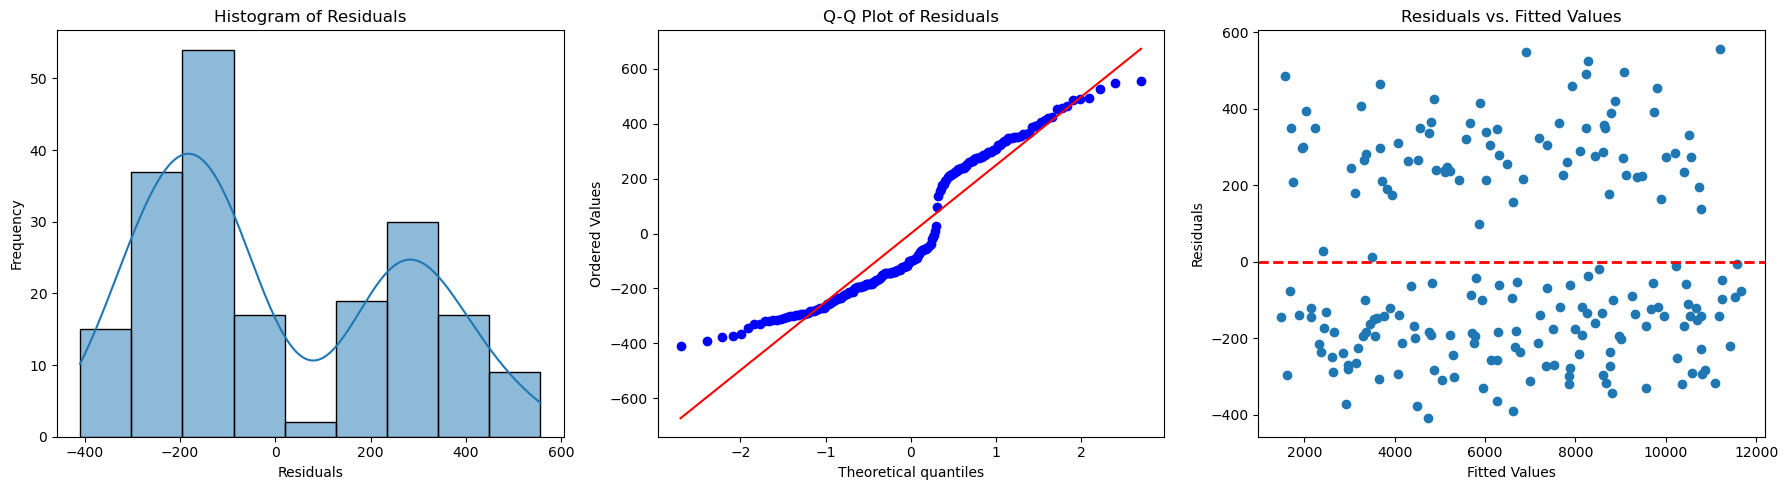

In [15]:
# d. Now look at the distribution of the error term. What problems do you see here?

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Plotting the residuals
residuals = model.resid

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Histogram of residuals
sns.histplot(residuals, kde=True, ax=ax[0])
ax[0].set_title('Histogram of Residuals')
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')

# Q-Q plot of residuals
stats.probplot(residuals, dist="norm", plot=ax[1])
ax[1].set_title('Q-Q Plot of Residuals')

# Residuals vs. fitted values
ax[2].scatter(model.fittedvalues, residuals)
ax[2].axhline(0, color='red', linestyle='dashed', linewidth=2)
ax[2].set_title('Residuals vs. Fitted Values')
ax[2].set_xlabel('Fitted Values')
ax[2].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

# 1. Histogram of Residuals

# 	•	Observation: The histogram reveals that the distribution of residuals does not resemble a normal distribution. It shows two distinct peaks (bimodal distribution), which is highly unusual for residuals in a well-specified linear regression model.

# 2. Q-Q Plot of Residuals

# 	•	Observation: In the Q-Q plot, if the residuals were normally distributed, we would expect them to lie along the straight line. However, there are clear deviations from this line, particularly in the tails, indicating the residuals are not normally distributed.

# 3. Residuals vs. Fitted Values

# 	•	Observation: Ideally, this plot should show no discernible pattern, and residuals should be randomly dispersed around the horizontal line at zero, indicating constant variance across all fitted values (homoscedasticity). The plot reveals a clear pattern with two bands of data points, suggesting non-linear relationships and potential heteroscedasticity, as the spread of residuals varies across the range of fitted values.

In [16]:
# 3. a. Import the data from tab ‘Bimodal Error 2’. This data is the same as the Bimodal Error 1 data,
# however we have added a ‘dummy’ variable (more on this next class).

#Importing Data
db_dir = os.getcwd()
db_dir = db_dir + '/data/MMA 860 Assessing and Testing Data File v1.0.xlsx'
data = pd.read_excel(db_dir, sheet_name='Bimodal Error 2')

In [18]:

from sklearn.linear_model import LinearRegression

train_X = data[['X1', 'X2', 'US']].values
train_y = data['Y'].values

reg = LinearRegression().fit(train_X, train_y)

print("R-Squared:", reg.score(train_X, train_y))
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Y ~ X1+X2+US',data).fit()
print(model.summary())

# 	•	R-squared: 0.999 - This model explains approximately 99.9% of the variability in the response variable  Y , indicating an extremely high degree of fit.
# 	•	Coefficients:
# 	•	Intercept ( b_0 ): 1014.1135, statistically significant with a p-value < 0.001.
# 	•	 X_1  Coefficient ( b_1 ): 100.2929, with a p-value < 0.001, suggesting a strong and significant positive relationship with  Y .
# 	•	 X_2  Coefficient ( b_2 ): 9.5425, also statistically significant with a p-value < 0.001, indicating a positive but smaller effect on  Y  compared to  X_1 .
# 	•	‘US’ Dummy Variable ( b_3 ): 491.7342, with a p-value < 0.001, indicating a significant positive impact on  Y  when the dummy variable is active (presumably representing the presence of a specific condition, such as being in the US).

# Additional Statistical Findings:

# 	•	F-statistic: 54830, with a p-value practically zero, confirming the overall model’s statistical significance.

R-Squared: 0.9988097721124911
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.483e+04
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          2.89e-286
Time:                        15:21:11   Log-Likelihood:                -1201.3
No. Observations:                 200   AIC:                             2411.
Df Residuals:                     196   BIC:                             2424.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1014.1135 

In [ ]:
# c. Examine the regression output table and error distribution. Suppose this reflected store sales data
# for stores in Canada and the US where x1 and x2 were measures of local customer base and
# economic activity. Explain to your manager why the results were different.


# 	1.	Impact of US Dummy Variable:
# 	•	Significance: The ‘US’ dummy variable, with a coefficient of 491.7342 and a statistically significant p-value, indicates that stores in the US, on average, report approximately 492 more sales units than stores in Canada, assuming all other variables are held constant. This could be due to a variety of factors such as higher economic activity, larger customer bases, or different consumer behaviors in the US compared to Canada.
# 	•	Economic Implications: This suggests that the US market might have unique characteristics or advantages that are not present in Canada, which could include more favorable economic conditions, better positioning of stores, or more effective marketing strategies.
# 	2.	Role of X1 and X2:
# 	•	Customer Base and Economic Activity: Both  X_1  and  X_2  are significant predictors of sales, with  X_1  having a more substantial impact. This suggests that the local customer base (as represented by  X_1 ) has a stronger influence on sales compared to broader economic activity (as represented by  X_2 ). It’s important to note that the impact of economic activity is still positive, which indicates that better economic conditions do lead to higher sales.
# 	•	Relative Importance: The relative impact of these variables shows where management might focus efforts to improve sales, such as expanding the customer base (increasing  X_1 ) which could yield greater returns on sales than solely improving the economic conditions around stores.
# 	3.	Model Fit and Reliability:
# 	•	High R-squared: The model with the ‘US’ variable explains nearly all the variance in sales data (99.9% of the variability), which is exceptionally high. This suggests a very good fit and indicates that the model captures most factors affecting sales, making it a reliable tool for forecasting and analysis.
# 	•	Residual Analysis: The diagnostics indicate that the residuals do not show signs of autocorrelation or non-normality, which are common issues in regression analyses. This improves the reliability of the model’s forecasts and its statistical inferences.

In [19]:
# 4. a. Import the data from the tab ‘Nonlinear’.
#Importing Data
db_dir = os.getcwd()
db_dir = db_dir + '/data/MMA 860 Assessing and Testing Data File v1.0.xlsx'
data = pd.read_excel(db_dir, sheet_name='Nonlinear')

In [23]:
# b. Run the linear regression y = b0 + b1x1.


from sklearn.linear_model import LinearRegression

train_X = data[['X1']].values
train_y = data['Y'].values

reg = LinearRegression().fit(train_X, train_y)

print("R-Squared:", reg.score(train_X, train_y))
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Y ~ X1',data).fit()
print(model.summary())

# •	R-squared: 0.597 - This indicates that the model explains about 59.7% of the variability in the response variable  Y , which is moderate. This might suggest that while X1 has a significant impact, other factors (possibly non-linear components) are also influential.
# •	Coefficients:
# •	Intercept ( b_0 ): 622.1634, statistically significant with a p-value < 0.001. This represents the estimated value of  Y  when  X1  is 0.
# •	 X1  Coefficient ( b_1 ): -43.0341, also statistically significant (p-value < 0.001). This suggests a strong negative linear relationship between  X1  and  Y ; as  X1  increases,  Y  decreases.

# Statistical Significance:

# •	F-statistic: 288.3, with a p-value < 0.001, confirming that the model is statistically significant at the overall level.

R-Squared: 0.5965130882260246
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     288.3
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           2.73e-40
Time:                        15:44:21   Log-Likelihood:                -1148.3
No. Observations:                 197   AIC:                             2301.
Df Residuals:                     195   BIC:                             2307.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    622.1634 

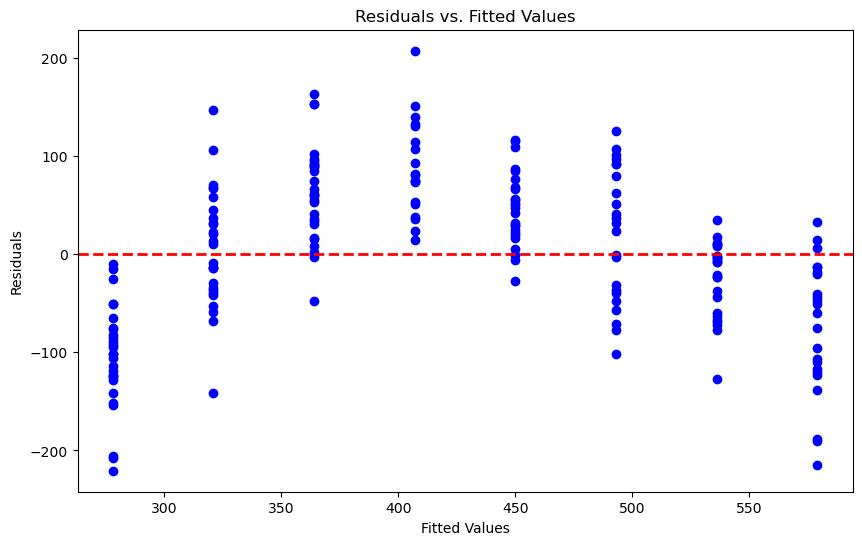

In [25]:
# c. Examine the residual plot. Notice the pattern.

# Plotting residuals to examine any patterns
residuals_nonlinear_simple = model.resid
fitted_values_nonlinear_simple = model.fittedvalues

plt.figure(figsize=(10, 6))
plt.scatter(fitted_values_nonlinear_simple, residuals_nonlinear_simple, color='blue')
plt.axhline(0, color='red', linestyle='dashed', linewidth=2)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# •	Non-random Pattern: The residuals do not appear randomly scattered around the horizontal line at zero. Instead, they exhibit a clear pattern, which suggests that the relationship between  X_1  and  Y  might be non-linear.
# •	Systematic Variation: The residuals seem to follow a systematic variation with the fitted values, which could indicate a quadratic relationship or another form of non-linearity that hasn’t been captured by the simple linear model.


R-Squared: 0.8131206206281273
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     422.1
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           2.20e-71
Time:                        15:54:28   Log-Likelihood:                -1072.5
No. Observations:                 197   AIC:                             2151.
Df Residuals:                     194   BIC:                             2161.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    419.2591 

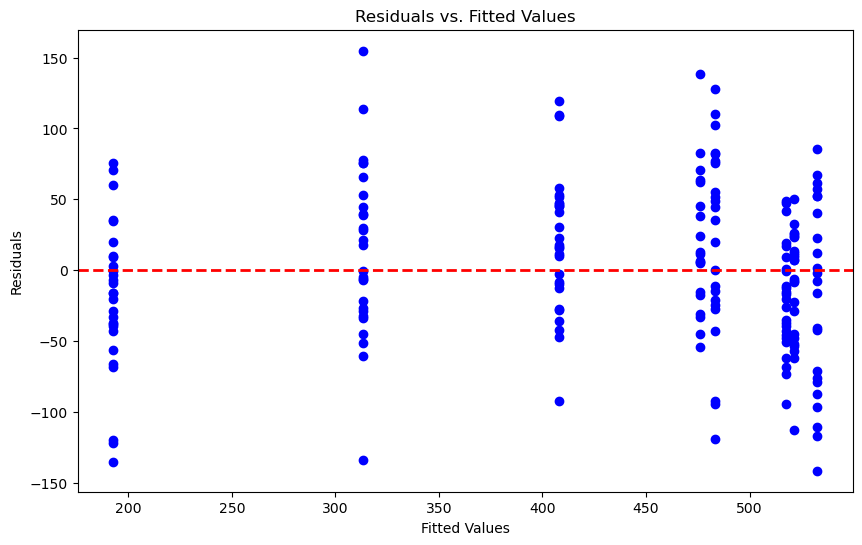

In [28]:
# d. Re-run the regression including the X1Squared variable. Note the difference in the residual
# plot.

from sklearn.linear_model import LinearRegression

train_X = data[['X1', 'X1Squared']].values
train_y = data['Y'].values

reg = LinearRegression().fit(train_X, train_y)

print("R-Squared:", reg.score(train_X, train_y))
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Y ~ X1+X1Squared',data).fit()
print(model.summary())

residuals_nonlinear_simple = model.resid
fitted_values_nonlinear_simple = model.fittedvalues

plt.figure(figsize=(10, 6))
plt.scatter(fitted_values_nonlinear_simple, residuals_nonlinear_simple, color='blue')
plt.axhline(0, color='red', linestyle='dashed', linewidth=2)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# d. Re-run the regression including the X1Squared variable. Note the difference in the residual
# plot.

# 	•	Pattern: The residual plot for the quadratic model shows a random scatter of points around the horizontal line at zero, unlike the pattern observed in the simple linear model. This random dispersion is indicative of a good fit, as it suggests that the model accounts for most of the variability and structure in the data.
# 	•	Implications: The absence of a discernible pattern or systematic variation in the residuals indicates that the quadratic model is a more appropriate fit for the data, capturing the nonlinear relationship effectively.

In [29]:
# 4. a. Import the data from the tab 'Outliers'.
#Importing Data
db_dir = os.getcwd()
db_dir = db_dir + '/data/MMA 860 Assessing and Testing Data File v1.0.xlsx'
data = pd.read_excel(db_dir, sheet_name='Outliers')

In [31]:
# b. Run the linear regression y = b0 + b1x1 + Outlier.

from sklearn.linear_model import LinearRegression

train_X = data[['X', 'Outlier']].values
train_y = data['Y'].values

reg = LinearRegression().fit(train_X, train_y)

print("R-Squared:", reg.score(train_X, train_y))
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Y ~ X+Outlier',data).fit()
print(model.summary())


# The inclusion of the ‘Outlier’ variable seems crucial for the model, significantly influencing the response variable  Y . It would be important to further investigate what this ‘Outlier’ variable represents and how it interacts with  X  and  Y  to better understand and possibly refine the model. If the ‘Outlier’ factor is a proxy for certain conditions or errors in data collection, addressing these directly could improve model accuracy and reliability. 

R-Squared: 0.5449080008258533
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     58.67
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           1.77e-17
Time:                        15:56:26   Log-Likelihood:                -432.04
No. Observations:                 101   AIC:                             870.1
Df Residuals:                      98   BIC:                             877.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.4067 

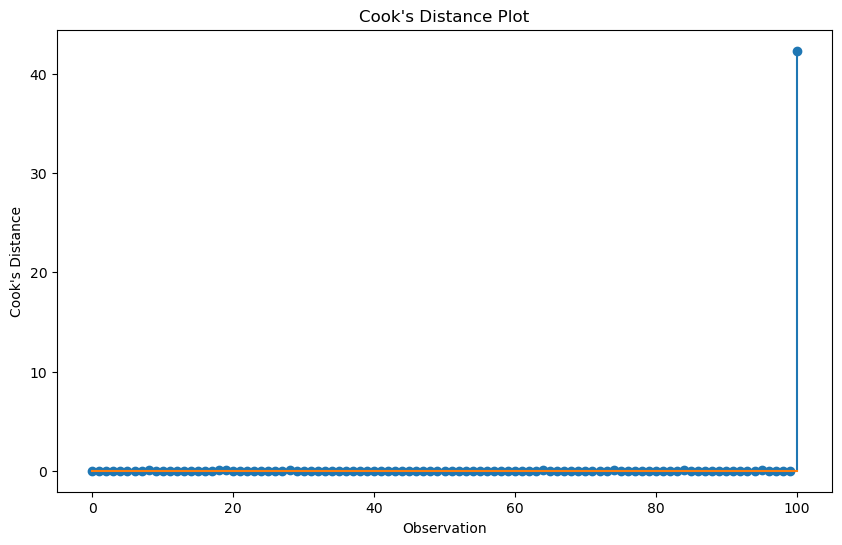

In [34]:
import matplotlib.pyplot as plt
import statsmodels.stats.outliers_influence as smoi

# Assuming 'model' is your fitted regression model
influence = model.get_influence()
cooks_d, p_values = influence.cooks_distance

# Plot Cook's Distance
plt.figure(figsize=(10, 6))
plt.stem(range(len(cooks_d)), cooks_d, linefmt='-', markerfmt='o', basefmt="-")
plt.title('Cook\'s Distance Plot')
plt.xlabel('Observation')
plt.ylabel('Cook\'s Distance')
plt.show()

# •	Baseline Cook’s Distance: Most observations have a very low Cook’s Distance, which means they have minimal influence on the regression model’s coefficients.
# •	Spike at Observation 100: The 100th observation has an extraordinarily high Cook’s Distance compared to all other points. This implies that this single observation is having a significant impact on the fit of the regression model, potentially skewing the results.